In [73]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
data = pd.read_csv('./data/telefonverisi_data.csv')

In [75]:
data.head()

,Ana Kamera FlaÅŸ,Ana Kamera Flaş,Ana Kamera Ã‡Ã¶zÃ¼nÃ¼rlÃ¼k AralÄ±ÄŸÄ±,Ana Kamera Çözünürlük Aralığı,Arka Kamera SayÄ±sÄ±,Arka Kamera Sayısı,ArttÄ±rÄ±labilir HafÄ±za (HafÄ±za KartÄ± DesteÄŸi),Arttırılabilir Hafıza (Hafıza Kartı Desteği),Batarya Kapasitesi AralÄ±ÄŸÄ±,Batarya Kapasitesi Aralığı,...,Ön Kamera Flaş,Ön Kamera Sayısı,Ön Kamera Çözünürlük Aralığı,Ön Kamera Çözünürlüğü,İşlemci Markası,İşletim Sistemi,Şarj Girişi,Şarj Hızı,url,price
0,NaN,Var,NaN,40 - 60 MP,NaN,3.0,NaN,Var,NaN,5000-6000 mAh,...,Yok,1.0,40 - 60 MP,14 - 20 MP,NaN,Android,USB Type-C,NaN,https://www.trendyol.com//reeder/s19-max-pro-4...,2.949 TL
1,NaN,Var,NaN,20 - 40 MP,NaN,3.0,NaN,Var,NaN,5000-6000 mAh,...,Yok,1.0,5 - 10 MP,8 MP,MediaTek,Android,USB Type-C,10-20 W,https://www.trendyol.com//xiaomi/redmi-12-128-...,7.549 TL
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.trendyol.com//xiaomi/redmi-12c-128...,5.149 TL
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.trendyol.com//xiaomi/redmi-note-12...,8.749 TL
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.trendyol.com//reeder/s19-max-pro-4...,2.955 TL


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 78 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Ana Kamera FlaÅŸ                                    21 non-null     object 
 1   Ana Kamera Flaş                                     215 non-null    object 
 2   Ana Kamera Ã‡Ã¶zÃ¼nÃ¼rlÃ¼k AralÄ±ÄŸÄ±               38 non-null     object 
 3   Ana Kamera Çözünürlük Aralığı                       421 non-null    object 
 4   Arka Kamera SayÄ±sÄ±                                38 non-null     float64
 5   Arka Kamera Sayısı                                  421 non-null    float64
 6   ArttÄ±rÄ±labilir HafÄ±za (HafÄ±za KartÄ± DesteÄŸi)  23 non-null     object 
 7   Arttırılabilir Hafıza (Hafıza Kartı Desteği)        229 non-null    object 
 8   Batarya Kapasitesi AralÄ±ÄŸÄ±                       38 non-null     object 
 9  

In [77]:
data = data.drop([
    'Ana Kamera FlaÅŸ', 'Ana Kamera Ã‡Ã¶zÃ¼nÃ¼rlÃ¼k AralÄ±ÄŸÄ±', 'Arka Kamera SayÄ±sÄ±',
    'ArttÄ±rÄ±labilir HafÄ±za (HafÄ±za KartÄ± DesteÄŸi)', 'Batarya Kapasitesi AralÄ±ÄŸÄ±', 'BaÄŸlantÄ±lar',
    'Bağlantılar', 'CPU AralÄ±k', 'CPU Aralık', 'Dahili HafÄ±za', 'Ekran Boyut AralÄ±ÄŸÄ±', 'Ekran Cinsi',
    'Ekran Yenileme HÄ±zÄ±', 'Ekran Ã‡Ã¶zÃ¼nÃ¼rlÃ¼ÄŸÃ¼', 'GPS', 'Garanti SÃ¼resi', 'GÃ¶rÃ¼ntÃ¼ Teknolojisi',
    'GÃ¶rÃ¼ntÃ¼lÃ¼ KonuÅŸma', 'Görüntü Teknolojisi', 'Kablosuz Åžarj', 'Kamera Ã‡Ã¶zÃ¼nÃ¼rlÃ¼ÄŸÃ¼',
    'KulaklÄ±k GiriÅŸi', 'Mobil BaÄŸlantÄ± HÄ±zÄ±', 'Parmak Ä°zi Okuyucu', 'Pil GÃ¼cÃ¼ (mAh)', 'Radio',
    'Suya/Toza DayanÄ±klÄ±lÄ±k', 'Video KayÄ±t Ã‡Ã¶zÃ¼nÃ¼rlÃ¼ÄŸÃ¼', 'Video Kayıt Çözünürlüğü', 'YÃ¼z TanÄ±ma',
    'Ã–n Kamera FlaÅŸ', 'Ã–n Kamera SayÄ±sÄ±', 'Ã–n Kamera Ã‡Ã¶zÃ¼nÃ¼rlÃ¼k AralÄ±ÄŸÄ±', 'Ã–n Kamera Ã‡Ã¶zÃ¼nÃ¼rlÃ¼ÄŸÃ¼',
    'Ã‡ift Hat', 'Ä°ÅŸlemci MarkasÄ±', 'Åžarj HÄ±zÄ±', 'Ä°ÅŸletim Sistemi', 'Åžarj GiriÅŸi', 'Ön Kamera Flaş',
    'Ön Kamera Çözünürlük Aralığı', 'Şarj Hızı','Ana Kamera Flaş','Arttırılabilir Hafıza (Hafıza Kartı Desteği)','Bluetooth',
    'Ekran Teknolojisi','Ekran Yenileme Hızı','Ekran Çözünürlüğü','Görüntülü Konuşma','Kablosuz Şarj','Parmak İzi Okuyucu','Yüz Tanıma',
    'Ön Kamera Çözünürlüğü','İşlemci Markası','Ana Kamera Çözünürlük Aralığı','Batarya Kapasitesi Aralığı','Ekran Boyut Aralığı',
    'Garanti Tipi','Kamera Çözünürlüğü','Kulaklık Girişi','Ekran Boyutu','Mobil Bağlantı Hızı','Şarj Girişi','Pil Gücü (mAh)','url'
], axis=1)


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Arka Kamera Sayısı      421 non-null    float64
 1   Cep Telefonu Modeli     235 non-null    object 
 2   Dahili Hafıza           421 non-null    object 
 3   Dokunmatik Ekran        459 non-null    object 
 4   Garanti Süresi          421 non-null    object 
 5   NFC                     459 non-null    object 
 6   RAM Kapasitesi          459 non-null    object 
 7   Renk                    459 non-null    object 
 8   Suya/Toza Dayanıklılık  421 non-null    object 
 9   Çift Hat                421 non-null    object 
 10  Ön Kamera Sayısı        421 non-null    float64
 11  İşletim Sistemi         421 non-null    object 
 12  price                   600 non-null    object 
dtypes: float64(2), object(11)
memory usage: 61.1+ KB


In [79]:
data.columns

Index(['Arka Kamera Sayısı', 'Cep Telefonu Modeli', 'Dahili Hafıza',
       'Dokunmatik Ekran', 'Garanti Süresi', 'NFC', 'RAM Kapasitesi', 'Renk',
       'Suya/Toza Dayanıklılık', 'Çift Hat', 'Ön Kamera Sayısı',
       'İşletim Sistemi', 'price'],
      dtype='object')

In [80]:
data.head(700)

,Arka Kamera Sayısı,Cep Telefonu Modeli,Dahili Hafıza,Dokunmatik Ekran,Garanti Süresi,NFC,RAM Kapasitesi,Renk,Suya/Toza Dayanıklılık,Çift Hat,Ön Kamera Sayısı,İşletim Sistemi,price
0,3.0,Reeder S19 Max Pro,128 GB,Var,2 Yıl,Yok,4 GB,Siyah,Yok,Var,1.0,Android,2.949 TL
1,3.0,NaN,128 GB,Var,2 Yıl,Yok,8 GB,Gümüş,Var,Var,1.0,Android,7.549 TL
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.149 TL
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.749 TL
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.955 TL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,4.0,Xiaomi 11T Pro,256 GB,Var,2 Yıl,Yok,8 GB,Mavi,Var,Yok,1.0,Android,23.499 TL
596,3.0,Redmi Note 11,64 GB,Var,2 Yıl,Yok,4 GB,Gri,Var,Var,1.0,Android,7.279 TL
597,4.0,NaN,128 GB,Var,2 Yıl,Yok,8 GB,Beyaz,Yok,Var,1.0,Android,"7.999,10 TL"
598,1.0,Huawei Y6 2019,32 GB,Var,2 Yıl,Yok,2 GB,Kahverengi,Yok,Var,1.0,Android,5.499 TL


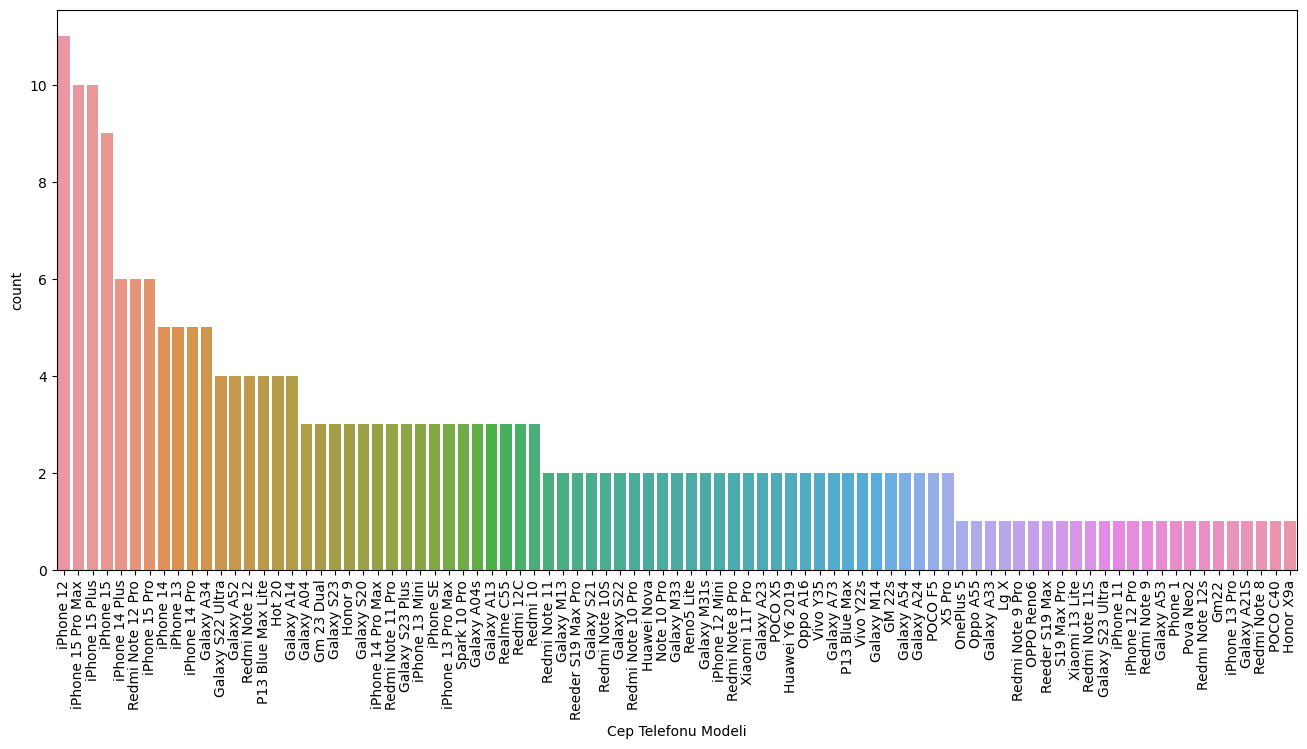

In [81]:
plt.figure(figsize=(16, 16))
plt.subplot(2, 1, 1)
sns.countplot(x='Cep Telefonu Modeli', data=data, order=data['Cep Telefonu Modeli'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [82]:
data.head(700)

,Arka Kamera Sayısı,Cep Telefonu Modeli,Dahili Hafıza,Dokunmatik Ekran,Garanti Süresi,NFC,RAM Kapasitesi,Renk,Suya/Toza Dayanıklılık,Çift Hat,Ön Kamera Sayısı,İşletim Sistemi,price
0,3.0,Reeder S19 Max Pro,128 GB,Var,2 Yıl,Yok,4 GB,Siyah,Yok,Var,1.0,Android,2.949 TL
1,3.0,NaN,128 GB,Var,2 Yıl,Yok,8 GB,Gümüş,Var,Var,1.0,Android,7.549 TL
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.149 TL
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.749 TL
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.955 TL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,4.0,Xiaomi 11T Pro,256 GB,Var,2 Yıl,Yok,8 GB,Mavi,Var,Yok,1.0,Android,23.499 TL
596,3.0,Redmi Note 11,64 GB,Var,2 Yıl,Yok,4 GB,Gri,Var,Var,1.0,Android,7.279 TL
597,4.0,NaN,128 GB,Var,2 Yıl,Yok,8 GB,Beyaz,Yok,Var,1.0,Android,"7.999,10 TL"
598,1.0,Huawei Y6 2019,32 GB,Var,2 Yıl,Yok,2 GB,Kahverengi,Yok,Var,1.0,Android,5.499 TL


In [83]:
for i in range(0,100):
    data["price"]=data.price.str.replace(',{}'.format(i), '')
    
data["price"]=data.price.str.replace(',00'.format(i), '')
data["price"]=data.price.str.replace(',01'.format(i), '')
data["price"]=data.price.str.replace(',02'.format(i), '')
data["price"]=data.price.str.replace(',03'.format(i), '')
data["price"]=data.price.str.replace(',04'.format(i), '')
data["price"]=data.price.str.replace(',05'.format(i), '')
data["price"]=data.price.str.replace(',06'.format(i), '')
data["price"]=data.price.str.replace(',07'.format(i), '')
data["price"]=data.price.str.replace(',08'.format(i), '')
data["price"]=data.price.str.replace(',09'.format(i), '')
data["price"]=data.price.str.replace(',', '')

In [84]:
# 1. 'TL' ifadesini kaldırın
data['price'] = data['price'].str.replace(' TL', '', regex=False)

# 2. Boş olmayan değerleri dönüştürün
data = data[data['price'].notnull()]
data['price'] = data['price'].astype(float)

In [85]:
data["price"]

0       2.949
1       7.549
2       5.149
3       8.749
4       2.955
        ...  
595    23.499
596     7.279
597     7.999
598     5.499
599    32.990
Name: price, Length: 600, dtype: float64

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Arka Kamera Sayısı      421 non-null    float64
 1   Cep Telefonu Modeli     235 non-null    object 
 2   Dahili Hafıza           421 non-null    object 
 3   Dokunmatik Ekran        459 non-null    object 
 4   Garanti Süresi          421 non-null    object 
 5   NFC                     459 non-null    object 
 6   RAM Kapasitesi          459 non-null    object 
 7   Renk                    459 non-null    object 
 8   Suya/Toza Dayanıklılık  421 non-null    object 
 9   Çift Hat                421 non-null    object 
 10  Ön Kamera Sayısı        421 non-null    float64
 11  İşletim Sistemi         421 non-null    object 
 12  price                   600 non-null    float64
dtypes: float64(3), object(10)
memory usage: 61.1+ KB


In [87]:
data.head(700)

,Arka Kamera Sayısı,Cep Telefonu Modeli,Dahili Hafıza,Dokunmatik Ekran,Garanti Süresi,NFC,RAM Kapasitesi,Renk,Suya/Toza Dayanıklılık,Çift Hat,Ön Kamera Sayısı,İşletim Sistemi,price
0,3.0,Reeder S19 Max Pro,128 GB,Var,2 Yıl,Yok,4 GB,Siyah,Yok,Var,1.0,Android,2.949
1,3.0,NaN,128 GB,Var,2 Yıl,Yok,8 GB,Gümüş,Var,Var,1.0,Android,7.549
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.149
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.749
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,4.0,Xiaomi 11T Pro,256 GB,Var,2 Yıl,Yok,8 GB,Mavi,Var,Yok,1.0,Android,23.499
596,3.0,Redmi Note 11,64 GB,Var,2 Yıl,Yok,4 GB,Gri,Var,Var,1.0,Android,7.279
597,4.0,NaN,128 GB,Var,2 Yıl,Yok,8 GB,Beyaz,Yok,Var,1.0,Android,7.999
598,1.0,Huawei Y6 2019,32 GB,Var,2 Yıl,Yok,2 GB,Kahverengi,Yok,Var,1.0,Android,5.499


In [88]:
data = data.rename(columns={
    'Dahili Hafıza': 'Dahili_Hafiza',
    'RAM Kapasitesi':'RAM_Kapasitesi',
    'Arka Kamera Sayısı':'Arka_Kamera_Sayisi',
    'Cep Telefonu Modeli':'Cep_Telefonu_Modeli',
    'Dokunmatik Ekran':'Dokunmatik_Ekran',
    'Suya/Toza Dayanıklılık': 'Suya_Toza_Dayanıklılık',
    'Çift Hat': 'Çift_Hat',
    'Ön Kamera Sayısı': 'Ön_Kamera_Sayısı',
    'İşletim Sistemi': 'İşletim_Sistemi',
    'Garanti Süresi': 'Garanti_Süresi',
    'price':'Fiyat',
    
})

In [90]:
data["Dahili_Hafiza"]=data.Dahili_Hafiza.str.replace('GB','')
data["RAM_Kapasitesi"]=data.RAM_Kapasitesi.str.replace('GB','')
data["Garanti_Süresi"]=data.Garanti_Süresi.str.replace('Yıl','')

In [91]:
data.head(700)

,Arka_Kamera_Sayisi,Cep_Telefonu_Modeli,Dahili_Hafiza,Dokunmatik_Ekran,Garanti_Süresi,NFC,RAM_Kapasitesi,Renk,Suya_Toza_Dayanıklılık,Çift_Hat,Ön_Kamera_Sayısı,İşletim_Sistemi,Fiyat
0,3.0,Reeder S19 Max Pro,128,Var,2,Yok,4,Siyah,Yok,Var,1.0,Android,2.949
1,3.0,NaN,128,Var,2,Yok,8,Gümüş,Var,Var,1.0,Android,7.549
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.149
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.749
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,4.0,Xiaomi 11T Pro,256,Var,2,Yok,8,Mavi,Var,Yok,1.0,Android,23.499
596,3.0,Redmi Note 11,64,Var,2,Yok,4,Gri,Var,Var,1.0,Android,7.279
597,4.0,NaN,128,Var,2,Yok,8,Beyaz,Yok,Var,1.0,Android,7.999
598,1.0,Huawei Y6 2019,32,Var,2,Yok,2,Kahverengi,Yok,Var,1.0,Android,5.499


In [92]:
data.tail()

,Arka_Kamera_Sayisi,Cep_Telefonu_Modeli,Dahili_Hafiza,Dokunmatik_Ekran,Garanti_Süresi,NFC,RAM_Kapasitesi,Renk,Suya_Toza_Dayanıklılık,Çift_Hat,Ön_Kamera_Sayısı,İşletim_Sistemi,Fiyat
595,4.0,Xiaomi 11T Pro,256,Var,2,Yok,8,Mavi,Var,Yok,1.0,Android,23.499
596,3.0,Redmi Note 11,64,Var,2,Yok,4,Gri,Var,Var,1.0,Android,7.279
597,4.0,NaN,128,Var,2,Yok,8,Beyaz,Yok,Var,1.0,Android,7.999
598,1.0,Huawei Y6 2019,32,Var,2,Yok,2,Kahverengi,Yok,Var,1.0,Android,5.499
599,NaN,NaN,NaN,Var,NaN,Var,12,Siyah,NaN,NaN,NaN,NaN,32.990


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Arka_Kamera_Sayisi      421 non-null    float64
 1   Cep_Telefonu_Modeli     235 non-null    object 
 2   Dahili_Hafiza           421 non-null    object 
 3   Dokunmatik_Ekran        459 non-null    object 
 4   Garanti_Süresi          421 non-null    object 
 5   NFC                     459 non-null    object 
 6   RAM_Kapasitesi          459 non-null    object 
 7   Renk                    459 non-null    object 
 8   Suya_Toza_Dayanıklılık  421 non-null    object 
 9   Çift_Hat                421 non-null    object 
 10  Ön_Kamera_Sayısı        421 non-null    float64
 11  İşletim_Sistemi         421 non-null    object 
 12  Fiyat                   600 non-null    float64
dtypes: float64(3), object(10)
memory usage: 61.1+ KB


In [94]:
import pandas as pd

# Örnek olarak bir DataFrame oluşturun veya veri setinizi yükleyin
# Örneğin:
# df = pd.DataFrame({'Column1': [1, 2, 3, None, 5], 'Column2': [None, 7, 8, 9, 10]})

# DataFrame'inizdeki NaN değerlerin sayısını görüntüleyin
nan_count = data.isnull().sum().sum()

# Her sütun için NaN değerlerin sayısını görmek istiyorsanız:
# nan_count_per_column = df.isnull().sum()

# Sonucu yazdırın
print(f"Toplam NaN değer sayısı: {nan_count}")
# print("Her sütun için NaN değer sayısı:")
# print(nan_count_per_column)

Toplam NaN değer sayısı: 2182


In [95]:
data.to_csv(r'C:\Users\muham\Desktop\makine öğrenmesi proje\veri_düzenleme.csv', index=False)